# Allen Brain Atlas Aging Human Brain No Disease - Tissue Age (RNA-Seq)

Author: Moshe Silverstein <br/>
Date: 03-2018 <br/>
Data Source Home: http://www.brain-map.org/ <br/>
Data Source Download: http://aging.brain-map.org/download/index

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/Aging Dementia and TBI study/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Mon Mar 12 11:34:01 2018 EDT

# Path to Output Files

In [5]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/Aging Dementia and TBI study/Output/'

# Load Data

In [6]:
matrix = pd.read_csv('Input/gene_expression_matrix_2016-03-03/fpkm_table_normalized.csv', index_col=0)

In [7]:
matrix.head()

,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,496100288,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
gene_id \ rnaseq_profile_id,,,,,,,,,,,,,,,,,,,,,
499304660,0.655725,0.095143,0.000000,0.000000,0.000000,0.000000,0.000000,0.151241,0.172735,0.000000,...,0.280921,0.464819,0.000000,0.316875,0.250307,0.000000,0.000000,0.126133,0.000000,0.00000
499304661,4.526404,8.855850,4.868456,4.851842,3.600344,5.130615,5.496470,4.830538,4.565007,5.638256,...,5.996864,3.933522,4.831699,4.727912,4.645094,5.664388,8.329654,5.712798,4.639818,4.70802
499304662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
499304663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
499304664,0.039654,0.016492,0.000000,0.170431,0.000000,0.007901,0.137523,0.087973,0.000000,0.166256,...,0.000000,0.073427,0.040766,0.044743,0.119941,0.114818,0.143532,0.000000,0.075834,0.00000


In [8]:
matrix.shape

(50281, 377)

# Load Sample Metadata

In [9]:
sample_meta = pd.read_csv('Input/gene_expression_matrix_2016-03-03/columns-samples.csv', index_col=0)

In [10]:
sample_meta.head()

,donor_id,donor_name,specimen_id,specimen_name,rna_well_id,polygon_id,structure_id,structure_acronym,structure_color,structure_name,hemisphere
rnaseq_profile_id,,,,,,,,,,,
488395315,309335467,H14.09.030,309357843,H14.09.030.TCx.01,395325172,320817998,10235,TCx,#ebbfd0,temporal neocortex,left
496100277,309335441,H14.09.004,309357624,H14.09.004.PCx.01,320630866,310967169,10557,FWM,#f2f1f0,white matter of forebrain,right
496100278,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630834,310790571,10557,FWM,#f2f1f0,white matter of forebrain,left
496100279,309335438,H14.09.001,309357599,H14.09.001.TCx.01,320630838,310790522,10235,TCx,#ebbfd0,temporal neocortex,left
496100281,309335439,H14.09.002,309357603,H14.09.002.HIP.01,320630842,310790372,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right


In [11]:
sample_meta.shape

(377, 11)

# Load Donor Metadata

In [12]:
donor_meta = pd.read_csv('Input/DonorInformation.csv', index_col=0) 

In [13]:
donor_meta.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
donor_id,,,,,,,,,,,,,,,,,,
326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


In [14]:
donor_meta.shape

(107, 18)

# Load Gene Metadata

In [15]:
gene_meta = pd.read_csv('Input/gene_expression_matrix_2016-03-03/rows-genes.csv', index_col=0)

In [16]:
gene_meta.head()

,chromosome,gene_entrez_id,gene_symbol,gene_name
gene_id,,,,
499304660,1,100287102,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...
499304661,1,653635,WASH7P,WAS protein family homolog 7 pseudogene
499304662,1,102466751,MIR6859-1,microRNA 6859-1
499304663,1,100302278,MIR1302-2,microRNA 1302-2
499304664,1,645520,FAM138A,"family with sequence similarity 138, member A"


In [17]:
gene_meta.shape

(50281, 4)

# Select Only Healthy Samples (Controls)

In [18]:
no_demen_donor_ids = donor_meta[donor_meta['act_demented'] == 'No Dementia'].index

In [19]:
len(no_demen_donor_ids)

57

In [20]:
no_tbi_donor_ids = donor_meta[donor_meta['ever_tbi_w_loc'] == 'N'].index

In [21]:
len(no_tbi_donor_ids)

54

In [22]:
len(set(no_demen_donor_ids).intersection(set(no_tbi_donor_ids)))

30

In [23]:
no_demen_sample_ids = sample_meta.reset_index().set_index('donor_id').loc[no_demen_donor_ids, 'rnaseq_profile_id'].values

In [24]:
len(no_demen_sample_ids)

197

In [25]:
no_tbi_sample_ids = sample_meta.reset_index().set_index('donor_id').loc[no_tbi_donor_ids, 'rnaseq_profile_id'].values

In [26]:
len(no_tbi_sample_ids)

198

In [27]:
no_demen_tbi_sample_ids = list(set(no_demen_sample_ids.tolist()).intersection(set(no_tbi_sample_ids.tolist())))

In [28]:
len(no_demen_tbi_sample_ids)

111

In [29]:
no_demen_tbi_sample_ids = [str(x) for x in no_demen_tbi_sample_ids]

In [30]:
matrix = matrix[no_demen_tbi_sample_ids]

In [31]:
matrix.head()

,496100352,496100355,496100357,496100359,496100361,496100362,496100366,496100373,496100377,496100380,...,496100310,496100317,496100321,496100336,496100341,496100342,496100345,496100347,496100349,496100350
gene_id \ rnaseq_profile_id,,,,,,,,,,,,,,,,,,,,,
499304660,0.521739,0.000000,0.000000,0.383116,0.000000,0.303118,0.431920,0.000000,0.034111,0.000000,...,0.000000,1.062008,0.157651,0.181663,0.424591,0.314915,0.464248,0.454952,0.000000,0.0000
499304661,5.326263,6.528324,6.604264,4.853978,3.196394,7.732958,4.651649,3.181996,6.595209,5.264355,...,7.271441,11.091649,4.882839,3.177140,8.712326,9.336426,4.652290,2.466049,4.428467,5.7474
499304662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
499304663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
499304664,0.124766,0.000000,0.000000,0.000000,0.264420,0.000000,0.000000,0.054659,0.037694,0.082209,...,0.016693,0.068687,0.200249,0.069883,0.000000,0.000000,0.178911,0.028793,0.000000,0.0000


In [32]:
matrix.shape

(50281, 111)

# Map Sample Metadata to Sample ID

In [33]:
lst = []

for i,col in enumerate(matrix.columns):
    col_num = i+1
    sample = (
        str(sample_meta.loc[int(col), 'structure_name'])
        +'_'+
        str(donor_meta.loc[sample_meta.loc[int(col), 'donor_id'], 'age'])
    )
    lst.append(sample)
    
matrix.columns = lst

In [34]:
matrix.head()

,white matter of forebrain_90-94,hippocampus (hippocampal formation)_78,temporal neocortex_95-99,parietal neocortex_78,temporal neocortex_78,white matter of forebrain_78,temporal neocortex_78,parietal neocortex_78,parietal neocortex_95-99,white matter of forebrain_78,...,temporal neocortex_90-94,white matter of forebrain_81,hippocampus (hippocampal formation)_90-94,temporal neocortex_90-94,temporal neocortex_81,parietal neocortex_81,white matter of forebrain_90-94,parietal neocortex_90-94,hippocampus (hippocampal formation)_78,white matter of forebrain_95-99
gene_id \ rnaseq_profile_id,,,,,,,,,,,,,,,,,,,,,
499304660,0.521739,0.000000,0.000000,0.383116,0.000000,0.303118,0.431920,0.000000,0.034111,0.000000,...,0.000000,1.062008,0.157651,0.181663,0.424591,0.314915,0.464248,0.454952,0.000000,0.0000
499304661,5.326263,6.528324,6.604264,4.853978,3.196394,7.732958,4.651649,3.181996,6.595209,5.264355,...,7.271441,11.091649,4.882839,3.177140,8.712326,9.336426,4.652290,2.466049,4.428467,5.7474
499304662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
499304663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
499304664,0.124766,0.000000,0.000000,0.000000,0.264420,0.000000,0.000000,0.054659,0.037694,0.082209,...,0.016693,0.068687,0.200249,0.069883,0.000000,0.000000,0.178911,0.028793,0.000000,0.0000


In [35]:
matrix.shape

(50281, 111)

# Map Gene to Row

In [36]:
matrix.index = gene_meta['gene_symbol']

In [37]:
matrix.index.name = ''

In [38]:
matrix.head()

,white matter of forebrain_90-94,hippocampus (hippocampal formation)_78,temporal neocortex_95-99,parietal neocortex_78,temporal neocortex_78,white matter of forebrain_78,temporal neocortex_78,parietal neocortex_78,parietal neocortex_95-99,white matter of forebrain_78,...,temporal neocortex_90-94,white matter of forebrain_81,hippocampus (hippocampal formation)_90-94,temporal neocortex_90-94,temporal neocortex_81,parietal neocortex_81,white matter of forebrain_90-94,parietal neocortex_90-94,hippocampus (hippocampal formation)_78,white matter of forebrain_95-99
,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.521739,0.000000,0.000000,0.383116,0.000000,0.303118,0.431920,0.000000,0.034111,0.000000,...,0.000000,1.062008,0.157651,0.181663,0.424591,0.314915,0.464248,0.454952,0.000000,0.0000
WASH7P,5.326263,6.528324,6.604264,4.853978,3.196394,7.732958,4.651649,3.181996,6.595209,5.264355,...,7.271441,11.091649,4.882839,3.177140,8.712326,9.336426,4.652290,2.466049,4.428467,5.7474
MIR6859-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
FAM138A,0.124766,0.000000,0.000000,0.000000,0.264420,0.000000,0.000000,0.054659,0.037694,0.082209,...,0.016693,0.068687,0.200249,0.069883,0.000000,0.000000,0.178911,0.028793,0.000000,0.0000


# Save Unfiltered Matrix to File

In [39]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [40]:
normalized_matrix = matrix.copy()

In [41]:
normalized_matrix.head()

,white matter of forebrain_90-94,hippocampus (hippocampal formation)_78,temporal neocortex_95-99,parietal neocortex_78,temporal neocortex_78,white matter of forebrain_78,temporal neocortex_78,parietal neocortex_78,parietal neocortex_95-99,white matter of forebrain_78,...,temporal neocortex_90-94,white matter of forebrain_81,hippocampus (hippocampal formation)_90-94,temporal neocortex_90-94,temporal neocortex_81,parietal neocortex_81,white matter of forebrain_90-94,parietal neocortex_90-94,hippocampus (hippocampal formation)_78,white matter of forebrain_95-99
,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.521739,0.000000,0.000000,0.383116,0.000000,0.303118,0.431920,0.000000,0.034111,0.000000,...,0.000000,1.062008,0.157651,0.181663,0.424591,0.314915,0.464248,0.454952,0.000000,0.0000
WASH7P,5.326263,6.528324,6.604264,4.853978,3.196394,7.732958,4.651649,3.181996,6.595209,5.264355,...,7.271441,11.091649,4.882839,3.177140,8.712326,9.336426,4.652290,2.466049,4.428467,5.7474
MIR6859-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
FAM138A,0.124766,0.000000,0.000000,0.000000,0.264420,0.000000,0.000000,0.054659,0.037694,0.082209,...,0.016693,0.068687,0.200249,0.069883,0.000000,0.000000,0.178911,0.028793,0.000000,0.0000


In [42]:
normalized_matrix.shape

(50281, 111)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [43]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [44]:
normalized_matrix.head()

,white matter of forebrain_90-94,hippocampus (hippocampal formation)_78,temporal neocortex_95-99,parietal neocortex_78,temporal neocortex_78,white matter of forebrain_78,temporal neocortex_78,parietal neocortex_78,parietal neocortex_95-99,white matter of forebrain_78,...,temporal neocortex_90-94,white matter of forebrain_81,hippocampus (hippocampal formation)_90-94,temporal neocortex_90-94,temporal neocortex_81,parietal neocortex_81,white matter of forebrain_90-94,parietal neocortex_90-94,hippocampus (hippocampal formation)_78,white matter of forebrain_95-99
DDX11L1,0.521739,0.315061,0.315061,0.383116,0.315061,0.303118,0.431920,0.315061,0.034111,0.315061,...,0.315061,1.062008,0.157651,0.181663,0.424591,0.314915,0.464248,0.454952,0.315061,0.315061
WASH7P,5.326263,6.528324,6.604264,4.853978,3.196394,7.732958,4.651649,3.181996,6.595209,5.264355,...,7.271441,11.091649,4.882839,3.177140,8.712326,9.336426,4.652290,2.466049,4.428467,5.747400
FAM138A,0.124766,0.082151,0.082151,0.082151,0.264420,0.082151,0.082151,0.054659,0.037694,0.082209,...,0.016693,0.068687,0.200249,0.069883,0.082151,0.082151,0.178911,0.028793,0.082151,0.082151
OR4G11P,0.064636,0.064636,0.064636,0.064636,0.064636,0.064636,0.064636,0.064636,0.064636,0.064636,...,0.064636,0.064636,0.064636,0.064636,0.064636,0.064636,0.064636,0.092386,0.064636,0.064636
OR4F5,0.033859,0.033859,0.050482,0.033859,0.033859,0.033859,0.033859,0.033859,0.033859,0.033859,...,0.033859,0.033859,0.033859,0.033859,0.027069,0.033859,0.033859,0.033859,0.033859,0.033859


In [45]:
normalized_matrix.shape

(42689, 111)

# Log2 Transform

In [46]:
normalized_matrix = mf.log2(normalized_matrix)

In [47]:
normalized_matrix.head()

,white matter of forebrain_90-94,hippocampus (hippocampal formation)_78,temporal neocortex_95-99,parietal neocortex_78,temporal neocortex_78,white matter of forebrain_78,temporal neocortex_78,parietal neocortex_78,parietal neocortex_95-99,white matter of forebrain_78,...,temporal neocortex_90-94,white matter of forebrain_81,hippocampus (hippocampal formation)_90-94,temporal neocortex_90-94,temporal neocortex_81,parietal neocortex_81,white matter of forebrain_90-94,parietal neocortex_90-94,hippocampus (hippocampal formation)_78,white matter of forebrain_95-99
DDX11L1,0.605721,0.395129,0.395129,0.467922,0.395129,0.381968,0.517951,0.395129,0.048391,0.395129,...,0.395129,1.044050,0.211200,0.240818,0.510547,0.394969,0.550160,0.540971,0.395129,0.395129
WASH7P,2.661354,2.912329,2.926809,2.549417,2.069150,3.126470,2.498672,2.064192,2.925090,2.647166,...,3.048139,3.595939,2.556512,2.062516,3.279817,3.369666,2.498836,1.793292,2.440545,2.754332
FAM138A,0.169624,0.113901,0.113901,0.113901,0.338476,0.113901,0.113901,0.076777,0.053381,0.113979,...,0.023884,0.095839,0.263334,0.097454,0.113901,0.113901,0.237454,0.040952,0.113901,0.113901
OR4G11P,0.090361,0.090361,0.090361,0.090361,0.090361,0.090361,0.090361,0.090361,0.090361,0.090361,...,0.090361,0.090361,0.090361,0.090361,0.090361,0.090361,0.090361,0.127483,0.090361,0.090361
OR4F5,0.048039,0.048039,0.071052,0.048039,0.048039,0.048039,0.048039,0.048039,0.048039,0.048039,...,0.048039,0.048039,0.048039,0.048039,0.038534,0.048039,0.048039,0.048039,0.048039,0.048039


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [48]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [49]:
normalized_matrix.head()

,white matter of forebrain_90-94,hippocampus (hippocampal formation)_78,temporal neocortex_95-99,parietal neocortex_78,temporal neocortex_78,white matter of forebrain_78,temporal neocortex_78,parietal neocortex_78,parietal neocortex_95-99,white matter of forebrain_78,...,temporal neocortex_90-94,white matter of forebrain_81,hippocampus (hippocampal formation)_90-94,temporal neocortex_90-94,temporal neocortex_81,parietal neocortex_81,white matter of forebrain_90-94,parietal neocortex_90-94,hippocampus (hippocampal formation)_78,white matter of forebrain_95-99
DDX11L1,0.636604,0.368853,0.401358,0.444310,0.385169,0.393512,0.508910,0.390441,0.047719,0.380558,...,0.398139,1.048174,0.210250,0.236718,0.496410,0.391832,0.561698,0.521881,0.385169,0.391978
WASH7P,2.667711,2.972361,2.911721,2.609823,2.076710,3.174516,2.536290,2.082862,2.913645,2.691117,...,3.041866,3.690894,2.543477,2.126412,3.340364,3.410389,2.533258,1.795515,2.401888,2.718408
FAM138A,0.172000,0.105084,0.110231,0.105507,0.330225,0.111264,0.109270,0.074705,0.052660,0.106343,...,0.025718,0.093409,0.260728,0.096301,0.112821,0.114399,0.241464,0.038408,0.109052,0.111588
OR4G11P,0.091323,0.083501,0.086718,0.082773,0.086184,0.087954,0.086650,0.087786,0.089229,0.083796,...,0.092859,0.088156,0.087954,0.088904,0.088206,0.090860,0.092241,0.124166,0.085693,0.089039
OR4F5,0.048602,0.043228,0.067989,0.042991,0.045345,0.047351,0.045122,0.046105,0.047329,0.044077,...,0.050049,0.045579,0.045464,0.046336,0.037735,0.048790,0.048737,0.045579,0.045554,0.047700


# Normalize Matrix (z-score the rows)

In [50]:
mf.zscore(normalized_matrix, 'row')

/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/Aging Dementia and TBI study/my_functions.py:57: RuntimeWarning: invalid value encountered in double_scalars
  for y in inputDF.iloc[index]]


In [51]:
normalized_matrix.head()

,white matter of forebrain_90-94,hippocampus (hippocampal formation)_78,temporal neocortex_95-99,parietal neocortex_78,temporal neocortex_78,white matter of forebrain_78,temporal neocortex_78,parietal neocortex_78,parietal neocortex_95-99,white matter of forebrain_78,...,temporal neocortex_90-94,white matter of forebrain_81,hippocampus (hippocampal formation)_90-94,temporal neocortex_90-94,temporal neocortex_81,parietal neocortex_81,white matter of forebrain_90-94,parietal neocortex_90-94,hippocampus (hippocampal formation)_78,white matter of forebrain_95-99
DDX11L1,7.944327,-0.782022,0.277361,1.677230,-0.250241,0.021655,3.782618,-0.078420,-11.248172,-0.400524,...,0.172440,21.357867,-5.951063,-5.088440,3.375227,-0.033096,5.503049,4.205344,-0.250241,-0.028353
WASH7P,0.217934,1.283770,1.071619,0.015406,-1.849726,1.991026,-0.241852,-1.828203,1.078350,0.299821,...,1.526940,3.797610,-0.216708,-1.675839,2.571254,2.816242,-0.252461,-2.833506,-0.712067,0.395301
FAM138A,3.493669,-0.456743,-0.152901,-0.431786,12.834559,-0.091944,-0.209616,-2.250232,-3.551675,-0.382437,...,-5.142166,-1.146017,8.731808,-0.975262,0.000000,0.093128,7.594491,-4.393051,-0.222510,-0.072818
OR4G11P,0.212569,-2.140833,-1.173052,-2.359900,-1.333752,-0.801178,-1.193424,-0.851650,-0.417652,-2.052267,...,0.674500,-0.740459,-0.801178,-0.515404,-0.725476,0.073071,0.488738,10.094109,-1.481351,-0.474807
OR4F5,0.155886,-1.688162,6.808040,-1.769543,-0.961535,-0.273433,-1.038144,-0.700993,-0.281050,-1.396681,...,0.652403,-0.881185,-0.920797,-0.621685,-3.572821,0.220396,0.202412,-0.881185,-0.889797,-0.153580


# Merge Like Column (by taking the mean)

In [52]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [53]:
normalized_matrix.shape

(42689, 40)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [54]:
mf.mapgenesymbols(normalized_matrix)

In [55]:
normalized_matrix.shape

(28333, 40)

# Merge Duplicate Genes By Rows

In [56]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [57]:
normalized_matrix.shape

(28209, 40)

# Histogram of First Sample

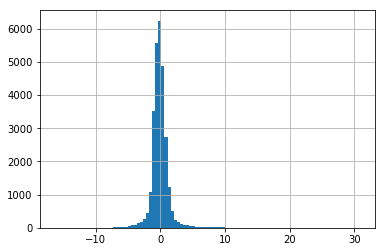

In [58]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

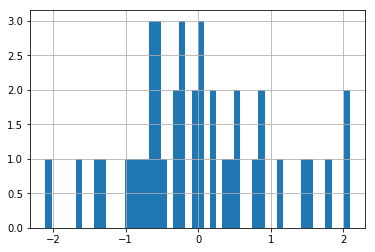

In [59]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=50)

In [60]:
normalized_matrix.dropna(how='all', axis=0, inplace=True)
normalized_matrix.dropna(how='all', axis=1, inplace=True)

# Save Filtered Matrix

In [61]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [62]:
gene_list = mf.createGeneList(normalized_matrix)

In [63]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2M-AS1,144571


In [64]:
gene_list.shape

(28206, 2)

# Save Gene List

In [65]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [66]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

In [67]:
for index in metaData.index:
    metaData.loc[index, 'Structure'] = index.split('_')[0]
    metaData.loc[index, 'Age'] = index.split('_')[1]

In [68]:
metaData.head()

,Structure,Age
hippocampus (hippocampal formation)_78,hippocampus (hippocampal formation),78
hippocampus (hippocampal formation)_81,hippocampus (hippocampal formation),81
hippocampus (hippocampal formation)_82,hippocampus (hippocampal formation),82
hippocampus (hippocampal formation)_84,hippocampus (hippocampal formation),84
hippocampus (hippocampal formation)_86,hippocampus (hippocampal formation),86


In [69]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [70]:
attribute_list.head()

,Structure,Age
Attributes,,
hippocampus (hippocampal formation)_78,hippocampus (hippocampal formation),78
hippocampus (hippocampal formation)_81,hippocampus (hippocampal formation),81
hippocampus (hippocampal formation)_82,hippocampus (hippocampal formation),82
hippocampus (hippocampal formation)_84,hippocampus (hippocampal formation),84
hippocampus (hippocampal formation)_86,hippocampus (hippocampal formation),86


In [71]:
attribute_list.shape

(40, 2)

# Save Attribute List

In [72]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [73]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [74]:
standard_matrix.head()

,hippocampus (hippocampal formation)_78,hippocampus (hippocampal formation)_81,hippocampus (hippocampal formation)_82,hippocampus (hippocampal formation)_84,hippocampus (hippocampal formation)_86,hippocampus (hippocampal formation)_87,hippocampus (hippocampal formation)_88,hippocampus (hippocampal formation)_89,hippocampus (hippocampal formation)_90-94,hippocampus (hippocampal formation)_95-99,...,white matter of forebrain_78,white matter of forebrain_81,white matter of forebrain_82,white matter of forebrain_84,white matter of forebrain_86,white matter of forebrain_87,white matter of forebrain_88,white matter of forebrain_89,white matter of forebrain_90-94,white matter of forebrain_95-99
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.428581,0.828728,0.528668,0.128650,-0.321242,-0.771199,-0.221249,-0.021300,0.328624,0.278601,...,0.978874,0.928803,-0.921169,0.678711,0.628689,0.878755,-0.721188,0.778686,0.728686,0.478544
A1BG-AS1,-0.371270,0.128650,-0.921169,-0.721188,-0.871187,-0.421286,-0.971137,-0.221249,0.028727,-0.521236,...,0.778686,-0.021300,0.078725,0.878755,-0.571213,-0.121320,-0.071257,-0.821229,0.528668,0.578716
A1CF,0.528668,-0.071257,0.428581,0.578716,0.628689,-0.421286,-0.671204,-0.621227,-0.571213,0.128650,...,-0.471273,-0.921169,0.678711,-0.171321,-0.971137,-0.771199,0.978874,-0.721188,-0.521236,0.028727
A2M,0.628689,0.828728,-0.171321,0.728686,0.378611,-0.421286,0.028727,0.328624,0.778686,0.128650,...,0.678711,0.928803,-0.671204,-0.621227,-0.221249,0.578716,-0.721188,0.528668,0.428581,-0.471273
A2M-AS1,-0.771199,-0.821229,-0.971137,-0.871187,-0.321242,-0.171321,-0.071257,-0.671204,0.178636,-0.221249,...,0.778686,0.728686,-0.421286,0.478544,0.978874,-0.471273,0.928803,0.428581,0.828728,0.378611


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

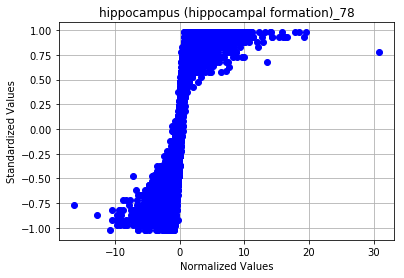

In [75]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [76]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [77]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [78]:
tertiary_matrix.head()

,hippocampus (hippocampal formation)_78,hippocampus (hippocampal formation)_81,hippocampus (hippocampal formation)_82,hippocampus (hippocampal formation)_84,hippocampus (hippocampal formation)_86,hippocampus (hippocampal formation)_87,hippocampus (hippocampal formation)_88,hippocampus (hippocampal formation)_89,hippocampus (hippocampal formation)_90-94,hippocampus (hippocampal formation)_95-99,...,white matter of forebrain_78,white matter of forebrain_81,white matter of forebrain_82,white matter of forebrain_84,white matter of forebrain_86,white matter of forebrain_87,white matter of forebrain_88,white matter of forebrain_89,white matter of forebrain_90-94,white matter of forebrain_95-99
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,1,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Save Teriary Matrix

In [79]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [80]:
name = 'aba_norm_aging_rnasqe_tissue_age_gene_up_set'

In [81]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [82]:
name = 'aba_norm_aging_rnasqe_tissue_age_gene_down_set'

In [83]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [84]:
name = 'aba_norm_aging_rnasqe_tissue_age_attribute_up_set'

In [85]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [86]:
name = 'aba_norm_aging_rnasqe_tissue_age_attribute_down_set'

In [87]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [88]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [89]:
attribute_similarity_matix.head()

,hippocampus (hippocampal formation)_78,hippocampus (hippocampal formation)_81,hippocampus (hippocampal formation)_82,hippocampus (hippocampal formation)_84,hippocampus (hippocampal formation)_86,hippocampus (hippocampal formation)_87,hippocampus (hippocampal formation)_88,hippocampus (hippocampal formation)_89,hippocampus (hippocampal formation)_90-94,hippocampus (hippocampal formation)_95-99,...,white matter of forebrain_78,white matter of forebrain_81,white matter of forebrain_82,white matter of forebrain_84,white matter of forebrain_86,white matter of forebrain_87,white matter of forebrain_88,white matter of forebrain_89,white matter of forebrain_90-94,white matter of forebrain_95-99
,,,,,,,,,,,,,,,,,,,,,
hippocampus (hippocampal formation)_78,1.000000,0.083484,0.151238,0.175798,0.182829,0.155760,0.139706,0.112436,0.303068,0.213237,...,0.018839,0.034828,-0.080111,-0.052351,-0.002606,-0.049854,-0.028051,-0.011292,-0.071123,-0.088204
hippocampus (hippocampal formation)_81,0.083484,1.000000,0.068338,0.072571,0.089233,0.032734,0.041786,0.023934,0.136632,0.094262,...,0.001595,-0.020251,-0.037547,0.000115,-0.029516,-0.009426,-0.007055,-0.039334,-0.021921,-0.022425
hippocampus (hippocampal formation)_82,0.151238,0.068338,1.000000,0.049973,0.133050,0.103984,0.082524,0.098601,0.188928,0.151006,...,-0.045324,-0.043477,0.008774,-0.028038,-0.032202,-0.026048,-0.045719,-0.041857,-0.077151,-0.074375
hippocampus (hippocampal formation)_84,0.175798,0.072571,0.049973,1.000000,0.095284,0.084775,0.073755,0.046956,0.186055,0.164157,...,-0.038102,-0.012332,-0.032944,-0.003030,-0.043461,-0.020674,-0.045390,-0.051443,-0.039287,-0.054662
hippocampus (hippocampal formation)_86,0.182829,0.089233,0.133050,0.095284,1.000000,0.166564,0.098617,0.119229,0.232238,0.193594,...,0.019038,0.023643,-0.065852,0.014408,0.067837,-0.007760,-0.040370,0.015323,-0.015468,-0.025390


# Save Attribute Similarity Matrix

In [90]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

In [91]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [92]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [93]:
gene_similarity_matix.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.027575,-0.459288,0.447121,0.103898,-0.169298,0.115520,-0.234274,0.481159,-0.180617,...,-0.456222,-0.017926,0.530075,-0.514998,0.580980,0.278824,-0.656272,-0.408951,0.482380,0.619802
A1BG-AS1,-0.027575,1.000000,0.036801,-0.014622,0.195826,-0.163003,0.227305,0.111486,-0.032064,-0.239301,...,0.046752,-0.348938,-0.069347,-0.174002,-0.147258,0.052701,0.101362,0.406110,0.260609,0.088251
A1CF,-0.459288,0.036801,1.000000,-0.335921,-0.381786,-0.290078,-0.095736,0.076523,-0.218034,0.272261,...,0.493579,0.234299,-0.333713,0.483353,-0.559934,-0.210851,0.509190,0.302767,-0.235919,-0.571072
A2M,0.447121,-0.014622,-0.335921,1.000000,-0.048501,0.071096,0.171341,-0.201486,0.564552,0.012301,...,-0.311227,0.292033,0.076288,-0.603850,0.266788,-0.127902,-0.489433,-0.264825,0.209310,0.259612
A2M-AS1,0.103898,0.195826,-0.381786,-0.048501,1.000000,0.102451,0.302919,0.069942,-0.153138,-0.139035,...,-0.435958,-0.541875,0.475051,-0.256402,0.460131,0.413524,-0.336731,0.160915,0.166755,0.510795


# Save Gene Similarity Matrix

In [94]:
filename = path+'aba_norm_aging_rnasqe_tissue_age_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [95]:
name = 'aba_norm_aging_rnasqe_tissue_age_gene_attribute_edge_list'

In [96]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  40 Out of 40   

 The number of statisticaly relevent gene-attribute associations is: 56388
